### This Python code presents a comprehensive workflow for preprocessing and preparing a census dataset for in-depth analysis. It begins with a series of detailed cleaning steps to ensure the data's integrity, followed by a thorough analysis of the results, which in turn are used to generate the recommendations required by the assignment.

## Importing Libraries

In [32]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## DATA OVERVIEW

In [33]:
census_df = pd.read_csv("W-T2_A24census-8.csv")
print(census_df.head())

  House Number             Street First Name Surname Age  \
0            1  Phillips Overpass       Luke  Walker  64   
1            1  Phillips Overpass       Karl   Smith  64   
2            1  Phillips Overpass  Catherine  Harris  29   
3            1  Phillips Overpass   Jennifer   Green  64   
4            1  Phillips Overpass     Bethan  Atkins  30   

  Relationship to Head of House Marital Status  Gender  \
0                          Head         Single    Male   
1                           NaN         Single    Male   
2                           NaN         Single  Female   
3                           NaN         Single  Female   
4                           NaN         Single  Female   

                       Occupation Infirmity   Religion  
0  Television/film/video producer       NaN  Methodist  
1                      Unemployed       NaN        NaN  
2               Buyer, industrial       NaN  Christian  
3                    Risk analyst       NaN        NaN  
4    

In [34]:
census_df.isnull().sum()

House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House     527
Marital Status                   1646
Gender                              0
Occupation                          0
Infirmity                        7570
Religion                         4275
dtype: int64

## CLEANING HOUSE NUMBER

In [35]:
census_df['House Number'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78',
       '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89',
       '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100',
       '101', '102', '103', '104', '105', '106', '107', '108', '109',
       '110', '111', '112', '113', '114', '115', '116', '117', '118',
       '119', '120', '121', '122', '123', '124', '125', '126', '127',
       '128', '129', '130', '131', '132', '133', '134', '135', '136',
       '137', '138', '139', '140', '141', '142', '143', '144', '1

In [36]:
#To replace the string 'Four' with the numeric '4' 
census_df['House Number'] = census_df['House Number'].replace({'Four': '4'})

In [37]:
# Convert the "House Number" column to integers
census_df['House Number'] = census_df['House Number'].astype(int)

In [38]:
print("Unique values after cleaning:")
census_df['House Number'].unique()

Unique values after cleaning:


array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

## CLEANING AGE

In [39]:
census_df['Age'].unique()

array(['64', '29', '30', '24', '28', '37', '56', '54', '59', '16', '32',
       '34', '3', '2', '39', '0', '50', '47', '48', '15', '51', '52',
       '43', '62', '38', '13', '36', '27', '46', '57', '81', '85', '49',
       '42', '18', '21', '35', '19', '8', '5', '1', '45', '20', '23',
       '33', '31', '80', '82', '69', '6', '40', '53', '12', '83', '7',
       '76', '77', '67', '65', '22', '44', '11', '55', '14', '63', '61',
       '25', '17', '41', '58', '60', '4', '74', '9', '78', '26', '73',
       '71', '68', '66', '10', '79', '72', '99', '87', '89', '91', '86',
       '70', '75', '88', 'one', '93', '94', '95', '90', '49.77636636',
       '105', '84', '104', '79.3573726', '100', '98', '103', '92', '96',
       '97', ' '], dtype=object)

In [40]:
# dictionary for replacements
replacements = {
    'one': '1',  
    ' ': np.nan   
}

# Perform the replacement
census_df['Age'] = census_df['Age'].replace(replacements)

In [41]:
# Convert the 'Age' column to numeric(float)
census_df['Age'] = pd.to_numeric(census_df['Age'], errors='coerce')

In [42]:
nan_age_rows = census_df[census_df['Age'].isna()]
print(nan_age_rows)


      House Number              Street First Name Surname  Age  \
7571             1  Campbell Warehouse      Sarah   Bryan  NaN   

     Relationship to Head of House Marital Status  Gender Occupation  \
7571                           NaN         Single  Female    Student   

     Infirmity Religion  
7571       NaN      NaN  


In [43]:
#since Sarah is a student we are going to imputE her blank age with the avaerage age for people who are'students' 
# (note: students not university and phd students )in their occupation column

student_avg_age = round(census_df[census_df['Occupation'] == 'Student']['Age'].mean())

print("Average age for 'Student':", int(student_avg_age))

# Impute Sarah's missing Age with the average age for 'Student'
census_df.loc[(census_df['First Name'] == 'Sarah') & (census_df['Age'].isna()), 'Age'] = student_avg_age

# Verify the update for Sarah
print(census_df.loc[(census_df['First Name'] == 'Sarah') & (census_df['Street'] == 'Campbell Warehouse'), ['First Name', 'Age']])


Average age for 'Student': 12
     First Name   Age
7571      Sarah  12.0


In [44]:
census_df['Age'] = np.ceil(census_df['Age']).astype(int)

In [45]:
print("Unique values after cleaning:")
print(census_df['Age'].unique())

Unique values after cleaning:
[ 64  29  30  24  28  37  56  54  59  16  32  34   3   2  39   0  50  47
  48  15  51  52  43  62  38  13  36  27  46  57  81  85  49  42  18  21
  35  19   8   5   1  45  20  23  33  31  80  82  69   6  40  53  12  83
   7  76  77  67  65  22  44  11  55  14  63  61  25  17  41  58  60   4
  74   9  78  26  73  71  68  66  10  79  72  99  87  89  91  86  70  75
  88  93  94  95  90 105  84 104 100  98 103  92  96  97]


## CLEANING RELATIONSHIP TO HEAD OF HOUSE

In [46]:
census_df['Relationship to Head of House'].unique()

array(['Head', nan, 'Son', 'Husband', 'Partner', 'Daughter', 'Sibling',
       'Lodger', 'Wife', 'Neice', ' ', 'Visitor', 'Granddaughter',
       'Adopted Granddaughter', 'Cousin', 'Nephew', 'Step-Daughter',
       'Step-Son', 'Grandson', 'Adopted Son', 'Adopted Daughter',
       'Son-in-law', 'Daughter-in-law'], dtype=object)

In [47]:
# strip whitespace from the column entries to catch any entries that are just spaces
census_df['Relationship to Head of House'] = census_df['Relationship to Head of House'].str.strip()

# Replace empty strings with NaN
census_df['Relationship to Head of House'].replace('', np.nan, inplace=True)

# rows where the value is NaN
nan_rows = census_df[census_df['Relationship to Head of House'].isna()]
print("Rows with NaN in 'Relationship to Head of House':")
print(nan_rows)


Rows with NaN in 'Relationship to Head of House':
      House Number             Street First Name   Surname  Age  \
1                1  Phillips Overpass       Karl     Smith   64   
2                1  Phillips Overpass  Catherine    Harris   29   
3                1  Phillips Overpass   Jennifer     Green   64   
4                1  Phillips Overpass     Bethan    Atkins   30   
9                3  Phillips Overpass    Chelsea      Dunn   24   
...            ...                ...        ...       ...  ...   
7601             1   Anvil Lighthouse      Aimee      Page   42   
7602             1   Anvil Lighthouse      Aaron    Miller   33   
7603             1   Anvil Lighthouse  Christian       Fry   63   
7604             1   Anvil Lighthouse       Ruth     Baker   39   
7605             1   Anvil Lighthouse       Glen  Davidson   42   

     Relationship to Head of House Marital Status  Gender  \
1                              NaN         Single    Male   
2                      

C:\Users\user\AppData\Local\Temp\ipykernel_16592\448800748.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  census_df['Relationship to Head of House'].replace('', np.nan, inplace=True)


In [48]:
# Correcting a typo:
census_df['Relationship to Head of House'] = census_df['Relationship to Head of House'].replace({'Neice': 'Niece'})

In [49]:
# Replace NaN with a placeholder value
census_df['Relationship to Head of House'].fillna('Unknown', inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_16592\1743773755.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  census_df['Relationship to Head of House'].fillna('Unknown', inplace=True)


In [50]:
# to check for houses without  head of house 

# composite household identifier
census_df['household'] = census_df['Street'].str.strip() + " " + census_df['House Number'].astype(str).str.strip()

# Function to check if a household has at least one "Head"
def has_head(group):
    # Check for "head" (case-insensitive) in the "Relationship to Head of House" column
    return group['Relationship to Head of House'].str.lower().eq('head').any()

# Group by the composite household and find households missing a "Head"
households_missing_head = census_df.groupby('household').filter(lambda group: not has_head(group))

# Get the unique household identifiers that are missing a "Head"
missing_household_ids = households_missing_head['household'].unique()

print("Households that are missing a 'Head':")
for household in missing_household_ids:
    print(household)


Households that are missing a 'Head':
Zigzag Corner 28


In [51]:
# The house on 28 Zigzag Corner, there are two occupants of the house a 48-year-old and a 14-year-old the 48-year-old was made the head of the house

census_df.loc[
    (census_df['House Number'] == 28) &
    (census_df['Street'] == 'Zigzag Corner') &
    (census_df['First Name'] == 'Lynda') &
    (census_df['Surname'] == 'Smith') &
    (census_df['Age'] == 48),
    'Relationship to Head of House'
] = 'Head'


In [52]:
# Print the updated row to verify the change
print(census_df.loc[
    (census_df['House Number'] == 28) &
    (census_df['Street'] == 'Zigzag Corner') &
    (census_df['First Name'] == 'Lynda') &
    (census_df['Surname'] == 'Smith') &
    (census_df['Age'] == 48),
    ['House Number', 'Street', 'First Name', 'Surname', 'Age', 'Relationship to Head of House']
])


      House Number         Street First Name Surname  Age  \
7159            28  Zigzag Corner      Lynda   Smith   48   

     Relationship to Head of House  
7159                          Head  


In [53]:
print("Unique values after cleaning:")
print(census_df['Relationship to Head of House'].unique())

Unique values after cleaning:
['Head' 'Unknown' 'Son' 'Husband' 'Partner' 'Daughter' 'Sibling' 'Lodger'
 'Wife' 'Niece' 'Visitor' 'Granddaughter' 'Adopted Granddaughter' 'Cousin'
 'Nephew' 'Step-Daughter' 'Step-Son' 'Grandson' 'Adopted Son'
 'Adopted Daughter' 'Son-in-law' 'Daughter-in-law']


## CLEANING MARITAL STATUS

In [54]:
census_df['Marital Status'].unique()

array(['Single', 'Divorced', 'Married', nan, 'Widowed', 'D', ' ', 'M',
       'S', 'W'], dtype=object)

In [55]:
# Remove leading/trailing whitespace
census_df['Marital Status'] = census_df['Marital Status'].str.strip()

# Replace empty strings with NaN
census_df['Marital Status'].replace('', np.nan, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_16592\2906151054.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  census_df['Marital Status'].replace('', np.nan, inplace=True)


In [56]:
# mapping from abbreviations to full names
status_mapping = {
    'S': 'Single',
    'M': 'Married',
    'W': 'Widowed',
    'D': 'Divorced'
}

# Replace abbreviated values with full names
census_df['Marital Status'] = census_df['Marital Status'].replace(status_mapping)


In [57]:
nan_rows_m = census_df[census_df['Marital Status'].isna()]
print("Rows with NaN in 'Marital Status':")
print(nan_rows_m)

Rows with NaN in 'Marital Status':
      House Number             Street First Name         Surname  Age  \
14               4  Phillips Overpass     Duncan            Hill   16   
17               5  Phillips Overpass       Jack           Brown    3   
18               5  Phillips Overpass     Dennis           Brown    2   
20               6  Phillips Overpass       Anne       Macdonald    0   
24               7  Phillips Overpass    Francis           Riley   15   
...            ...                ...        ...             ...  ...   
7613             1        Scott Ranch       Jean  Butler-Hussain   12   
7614             1        Scott Ranch     Pamela  Butler-Hussain   10   
7615             1        Scott Ranch     Teresa  Butler-Hussain   10   
7617             1    Grape Farmhouse    William        Chadwick   12   
7620             1          Wood Keep      Joyce        Marshall    0   

     Relationship to Head of House Marital Status  Gender Occupation  \
14              

In [58]:
# Filter rows where 'Marital Status' is NaN
nan_rows_m = census_df[census_df['Marital Status'].isna()]

# print max and min age  of those rows
print("Ages of people with NaN in 'Marital Status':")
print("max: ", nan_rows_m['Age'].max())
print("min: ", nan_rows_m['Age'].min())

Ages of people with NaN in 'Marital Status':
max:  23
min:  0


In [59]:
#imputing undergae in maritals status for people aged less than 18

# mask for rows where 'Marital Status' is NaN
mask = census_df['Marital Status'].isna()

# Replace NaN values in 'Marital Status' based on the corresponding 'Age'
census_df.loc[mask, 'Marital Status'] = census_df.loc[mask, 'Age'].apply(lambda age: 'Underage' if age < 18 else 'Single')

# Verify the changes
print(census_df[['Age', 'Marital Status']].loc[mask])


      Age Marital Status
14     16       Underage
17      3       Underage
18      2       Underage
20      0       Underage
24     15       Underage
...   ...            ...
7613   12       Underage
7614   10       Underage
7615   10       Underage
7617   12       Underage
7620    0       Underage

[1648 rows x 2 columns]


In [60]:
census_df.loc[
    (census_df['House Number'] == 1) &
    (census_df['Street'] == 'Campbell Warehouse') &
    (census_df['First Name'] == 'Sarah') &
    (census_df['Surname'] == 'Bryan') &
    (census_df['Age'] == 12),
    'Marital Status'
] = 'Underage'


In [61]:
# Print the updated row to verify the change
print(census_df.loc[
    (census_df['House Number'] == 1) &
    (census_df['Street'] == 'Campbell Warehouse') &
    (census_df['First Name'] == 'Sarah') &
    (census_df['Surname'] == 'Bryan') &
    (census_df['Age'] == 12),
    ['House Number', 'Street', 'First Name', 'Surname', 'Age', 'Relationship to Head of House', 'Marital Status']
])


      House Number              Street First Name Surname  Age  \
7571             1  Campbell Warehouse      Sarah   Bryan   12   

     Relationship to Head of House Marital Status  
7571                       Unknown       Underage  


In [62]:
print("Unique values after cleaning:")
print(census_df['Marital Status'].unique())

Unique values after cleaning:
['Single' 'Divorced' 'Married' 'Underage' 'Widowed']


In [63]:
# Create a backup of the original DataFrame
backup_df = census_df.copy()

## CLEANING GENDER

In [64]:
census_df['Gender'].unique()

array(['Male', 'Female', 'male', 'M', 'F', 'm', 'f', 'female', ' '],
      dtype=object)

In [65]:
census_df['Gender'] = census_df['Gender'].str.strip()   # Remove leading/trailing whitespace
census_df['Gender'].replace('', np.nan, inplace=True)    # Convert empty strings to NaN

C:\Users\user\AppData\Local\Temp\ipykernel_16592\3081483021.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  census_df['Gender'].replace('', np.nan, inplace=True)    # Convert empty strings to NaN


In [66]:
#Convert to lowercase to standardize for mapping
census_df['Gender'] = census_df['Gender'].str.lower()

In [67]:
#Map abbreviations and standardize names
gender_mapping = {
    'm': 'Male',
    'male': 'Male',
    'f': 'Female',
    'female': 'Female'
}

census_df['Gender'] = census_df['Gender'].replace(gender_mapping)

In [68]:
# Filter rows where 'Gender' is NaN and print the entire row information
nan_gender_rows = census_df[census_df['Gender'].isna()]
print("Rows where 'Gender' is NaN:")
print(nan_gender_rows)

Rows where 'Gender' is NaN:
      House Number       Street First Name Surname  Age  \
6527             3  Dunn Harbor     Ronald  Carter   10   

     Relationship to Head of House Marital Status Gender Occupation Infirmity  \
6527                           Son       Underage    NaN    Student       NaN   

     Religion      household  
6527      NaN  Dunn Harbor 3  


In [69]:
#since we can see the only row with NaN in Gender has a son relationship to the head of house we can assume he is male and
#therefore impute male in place of nan
mask_son = census_df['Gender'].isna() & (census_df['Relationship to Head of House'].str.lower().str.strip() == 'son')

# Impute 'Male' in the Gender column for the row
census_df.loc[mask_son, 'Gender'] = 'Male'


In [70]:
print("Unique values after cleaning:")
print(census_df['Gender'].unique())

Unique values after cleaning:
['Male' 'Female']


## CLEANING INFIRMITY

In [71]:
census_df['Infirmity'].unique()

array([nan, ' ', 'Blind', 'Physical Disability', 'Disabled',
       'Mental Disability', 'Deaf', 'Unknown Infection'], dtype=object)

In [72]:
# Remove extra whitespace from all entries in the Infirmity column
census_df['Infirmity'] = census_df['Infirmity'].str.strip()

# Replace empty strings with NaN
census_df['Infirmity'].replace('', np.nan, inplace=True)


C:\Users\user\AppData\Local\Temp\ipykernel_16592\3335299377.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  census_df['Infirmity'].replace('', np.nan, inplace=True)


In [73]:
# a mapping to consolidate disability categories
disability_mapping = {
    'Mental Disability': 'Disabled',
    'Physical Disability': 'Disabled',
    'Disabled': 'Disabled',
    'Blind' : 'Disabled',
    'Deaf' : 'Disabled' # Ensure all are mapped consistently
}

# Apply the mapping
census_df['Infirmity'] = census_df['Infirmity'].replace(disability_mapping)


In [74]:
census_df['Infirmity'].fillna('No Infirmity', inplace=True)


C:\Users\user\AppData\Local\Temp\ipykernel_16592\107584993.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  census_df['Infirmity'].fillna('No Infirmity', inplace=True)


In [75]:
print("Unique values after cleaning:")
print(census_df['Infirmity'].unique())

Unique values after cleaning:
['No Infirmity' 'Disabled' 'Unknown Infection']


## CLEANING RELIGION

In [76]:
census_df['Religion'].unique()

array(['Methodist', nan, 'Christian', 'Catholic', 'Muslim', 'Sikh',
       'Nope', 'Orthodoxy', 'Private', 'Jewish', 'Agnostic',
       'Housekeeper', ' ', 'Pagan', 'Bahai'], dtype=object)

In [77]:
# Remove extra whitespace
census_df['Religion'] = census_df['Religion'].str.strip()

# Replace blank strings with NaN
census_df['Religion'].replace('', np.nan, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_16592\399524290.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  census_df['Religion'].replace('', np.nan, inplace=True)


In [78]:
census_df['Religion'].unique()

array(['Methodist', nan, 'Christian', 'Catholic', 'Muslim', 'Sikh',
       'Nope', 'Orthodoxy', 'Private', 'Jewish', 'Agnostic',
       'Housekeeper', 'Pagan', 'Bahai'], dtype=object)

In [79]:
# ***because there is only one instance of someone filling religion as Housekeeper and private we are converting them to 'not religiuos' 
# and there were 5 people who filled nope we are assuming these people thought the answer was a 'yes' or 'no' question hence they filled nope 
#because they are not religious or they accidentally filled nope instead of none either way we have replaced them with 'Not religious'

# Define a mapping for the anomalies
anomaly_mapping = {
    'Nope': 'Not Religious',
    'Housekeeper': 'Not Religious',
    'Private': 'Not Religious'
}

# Replace the anomalies and then fill NaN values with "Not Religious"
census_df['Religion'] = census_df['Religion'].replace(anomaly_mapping).fillna('Not Religious')


In [80]:
#because he Danny lives boy is 14 and lives with his grandma who is catholic we can assume he is also catholic
census_df.loc[
    (census_df['House Number'] == 28) &
    (census_df['Street'] == 'Zigzag Corner') &
    (census_df['First Name'] == 'Danny') &
    (census_df['Surname'] == 'Smith') &
    (census_df['Age'] == 14),
    'Religion'
] = 'Catholic'

In [81]:
# Print the updated row to verify the change
print(census_df.loc[
    (census_df['House Number'] == 28) &
    (census_df['Street'] == 'Zigzag Corner') &
    (census_df['First Name'] == 'Danny') &
    (census_df['Surname'] == 'Smith') &
    (census_df['Age'] == 14),
    ['House Number', 'Street', 'First Name', 'Surname', 'Age', 'Relationship to Head of House', 'Religion']
])


      House Number         Street First Name Surname  Age  \
7160            28  Zigzag Corner      Danny   Smith   14   

     Relationship to Head of House  Religion  
7160                      Grandson  Catholic  


In [82]:
# For minors with a specified relationship to the head of household (i.e., not "Unknown"), 
# their religion was replaced with that of the head of household.

#Create a composite household identifier
census_df['household'] = census_df['Street'].str.strip() + " " + census_df['House Number'].astype(str).str.strip()

# Define a function to update religion for children in each household group
def update_child_religion(group):
    # Find the head of the household (case-insensitive comparison)
    head_rows = group[group['Relationship to Head of House'].str.strip().str.lower() == 'head']
    if not head_rows.empty:
        # Use the first "Head" found to determine the household's religion
        head_religion = head_rows.iloc[0]['Religion']
        # Identify children (0-17 years) whose relationship is not 'unknown'
        idx = group[(group['Age'] >= 0) & (group['Age'] <= 17) &
                    (group['Relationship to Head of House'].str.strip().str.lower() != 'unknown')].index
        group.loc[idx, 'Religion'] = head_religion
    return group

# Apply the function to each household group
census_df = census_df.groupby('household', group_keys=False).apply(update_child_religion)

# print the rows for children to verify the changes
print(census_df[(census_df['Age'] >= 0) & (census_df['Age'] <= 17)][['household', 'First Name', 'Surname', 'Age', 'Relationship to Head of House', 'Religion']])


                household First Name         Surname  Age  \
14    Phillips Overpass 4     Duncan            Hill   16   
17    Phillips Overpass 5       Jack           Brown    3   
18    Phillips Overpass 5     Dennis           Brown    2   
20    Phillips Overpass 6       Anne       Macdonald    0   
24    Phillips Overpass 7    Francis           Riley   15   
...                   ...        ...             ...  ...   
7613        Scott Ranch 1       Jean  Butler-Hussain   12   
7614        Scott Ranch 1     Pamela  Butler-Hussain   10   
7615        Scott Ranch 1     Teresa  Butler-Hussain   10   
7617    Grape Farmhouse 1    William        Chadwick   12   
7620          Wood Keep 1      Joyce        Marshall    0   

     Relationship to Head of House       Religion  
14                             Son      Christian  
17                             Son      Christian  
18                             Son      Christian  
20                        Daughter  Not Religious  
24     

C:\Users\user\AppData\Local\Temp\ipykernel_16592\2642167231.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  census_df = census_df.groupby('household', group_keys=False).apply(update_child_religion)


In [83]:
print("Unique values after cleaning:")
print(census_df['Religion'].unique())

Unique values after cleaning:
['Methodist' 'Not Religious' 'Christian' 'Catholic' 'Muslim' 'Sikh'
 'Orthodoxy' 'Jewish' 'Agnostic' 'Pagan' 'Bahai']


## CLEANING OCCUPATION

In [85]:
# For individuals aged 65 and older who were listed as "unemployed", their "Occupation" field was updated to "Retired".
 
census_df.loc[
    (census_df['Age'] >= 65) & 
    (census_df['Occupation'].str.lower() == 'unemployed'),
    'Occupation'
] = 'Retired'

#Print the number affected rows
print(len(census_df[(census_df['Age'] >= 65) & (census_df['Occupation'] == 'Retired')][['Age', 'Occupation']]))


38


## DETAILED ANALYSIS AND VISUALIZATIONS

#### PIE CHART FOR GENDER DISTRIBUTION

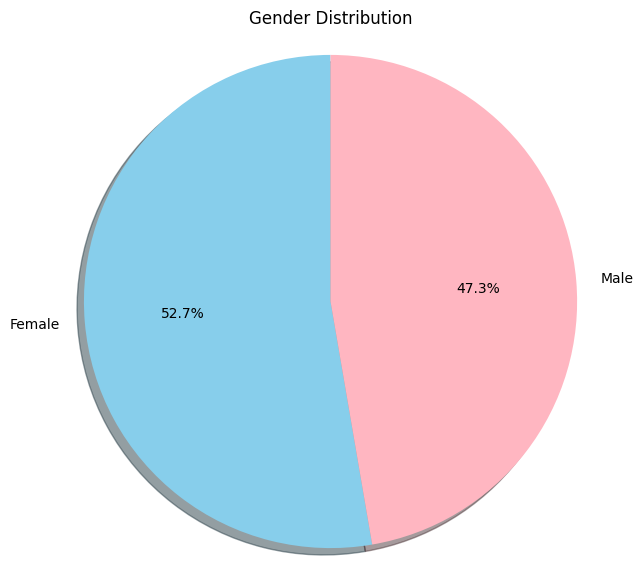

In [86]:
# count the occurrences of each gender
gender_counts = census_df['Gender'].value_counts()

# Prepare the labels and sizes for the pie chart
labels = gender_counts.index.tolist()
sizes = gender_counts.values

# Define colors
colors = ['skyblue', 'lightpink']  # Adjust based on the number of unique genders

# Create the pie chart
plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels, colors=colors[:len(labels)], autopct='%1.1f%%', startangle=90, shadow=True)

# Add a title and ensure the pie is a circle
plt.title('Gender Distribution')
plt.axis('equal') 

# Display the plot
plt.show()


#### POPULATION PYRAMID SHOWING AGE DISTRBUTION

C:\Users\user\AppData\Local\Temp\ipykernel_16592\1224809027.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pyramid_data = census_df.groupby(['Age_bin', 'Gender']).size().unstack(fill_value=0)


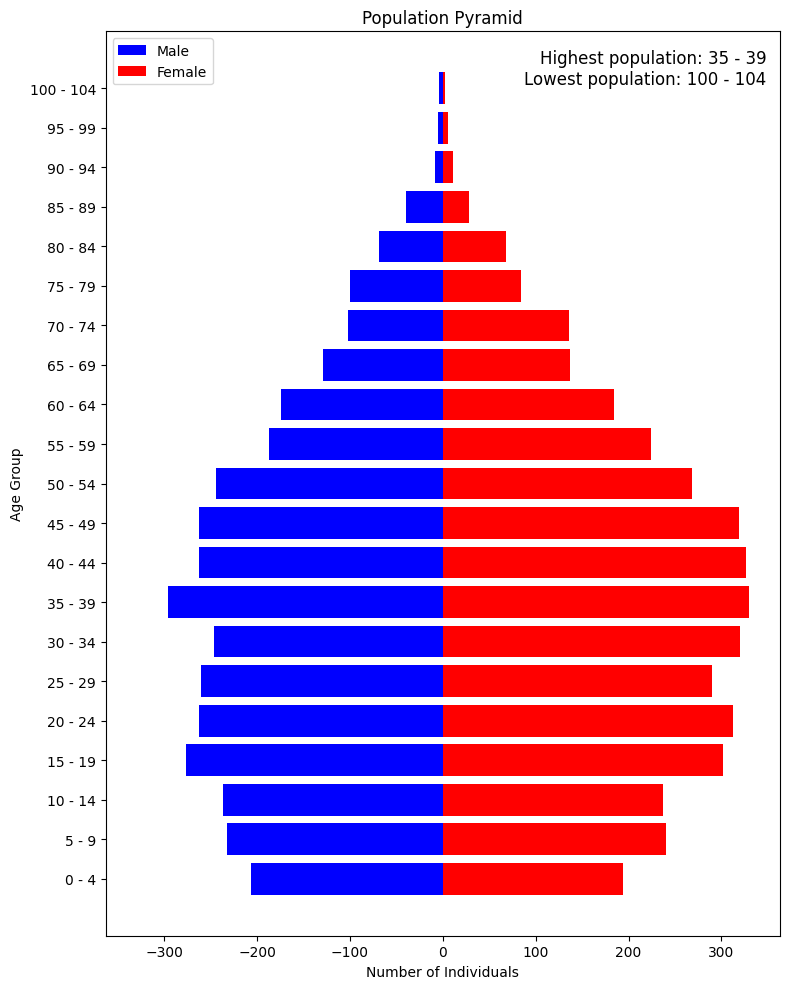

In [87]:
# Age Distribution (Age Pyramid)

# 5-year bins
bins = range(0, census_df['Age'].max() + 5, 5)

# 'Age_bin' column with intervals
census_df['Age_bin'] = pd.cut(census_df['Age'], bins=bins, right=False)

# Grouped by both Age_bin and Gender
pyramid_data = census_df.groupby(['Age_bin', 'Gender']).size().unstack(fill_value=0)

# oldest age group is at the top
pyramid_data = pyramid_data.iloc[::-1]

# Male and female counts
male_counts = pyramid_data['Male']
female_counts = pyramid_data['Female']

# Indices for the horizontal axis
y = np.arange(len(pyramid_data))

fig, ax = plt.subplots(figsize=(8, 10))

# males as negative (to the left)
ax.barh(y, -male_counts, color='blue', label='Male')

# females as positive (to the right)
ax.barh(y, female_counts, color='red', label='Female')

# Custom labels for the age bins that reflect the actual contents e.g 95-99
custom_labels = [f"{int(interval.left)} - {int(interval.right) - 1}" for interval in pyramid_data.index]

# y-axis tick positions and the custom labels
ax.set_yticks(y)
ax.set_yticklabels(custom_labels)

# full range is visible on both sides with 10% padding
max_count = max(male_counts.max(), female_counts.max())
ax.set_xlim(-max_count * 1.1, max_count * 1.1)

# Inverted y-axis so the oldest bin appears at the top
ax.invert_yaxis()

# Labeling
ax.set_xlabel('Number of Individuals')
ax.set_ylabel('Age Group')
ax.set_title('Population Pyramid')
ax.legend()

# Adding Highest & Lowest Population Age Group Info in Top Right
# Calculate total (male + female) per bin
total_counts = male_counts + female_counts

# Identify bins with highest & lowest total population
max_bin = total_counts.idxmax()  
min_bin = total_counts.idxmin()  

# bins converted  into the same text format as the y-axis labels
max_label = custom_labels[pyramid_data.index.get_loc(max_bin)]
min_label = custom_labels[pyramid_data.index.get_loc(min_bin)]

# texted to the figure in the top right corner
ax.text(
    0.98, 0.98,
    f"Highest population: {max_label}\nLowest population: {min_label}",
    transform=ax.transAxes,
    fontsize=12,
    verticalalignment='top',
    horizontalalignment='right',
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='none')
)

plt.tight_layout()
plt.savefig("population_pyramid1.png")
plt.show()


#### DIVISION INTO AGE GROUPS

In [88]:
# Summarize age groups to see potential future trends
age_groups = {
    'Children (<18)': census_df[census_df['Age'] < 18].shape[0],
    'Young Adults in Higher Education and Early Careers (18-24)': census_df[(census_df['Age'] >= 18) & (census_df['Age'] < 25)].shape[0],
    'Working Age (25-64)': census_df[(census_df['Age'] >= 25) & (census_df['Age'] < 65)].shape[0],
    'Retirement Age (65+)': census_df[census_df['Age'] >= 65].shape[0]
}

print("\nAge Group Distribution:")
total = census_df.shape[0]
for group, count in age_groups.items():
    print(f"{group}: {count} ({count/total*100:.2f}%)")


Age Group Distribution:
Children (<18): 1647 (21.60%)
Young Adults in Higher Education and Early Careers (18-24): 853 (11.19%)
Working Age (25-64): 4193 (55.00%)
Retirement Age (65+): 931 (12.21%)


#### UNEMPLOYMENT BY AGE GROUP EXCLUDING CERTAIN DEMOGRAOHICS

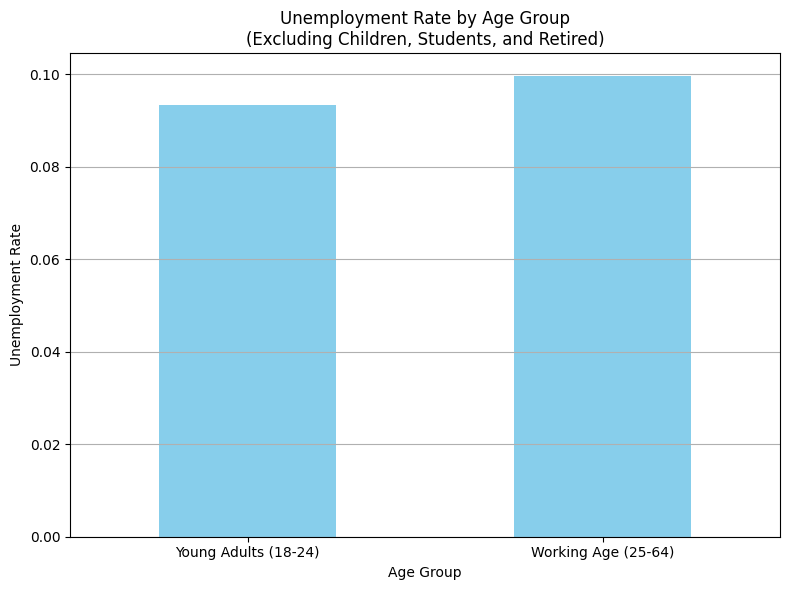

In [90]:
# Function that assigns each age to an age group
def get_age_group(age):
    if age < 18:
        return 'Children (<18)'
    elif age < 25:
        return 'Young Adults (18-24)'
    elif age < 65:
        return 'Working Age (25-64)'
    else:
        return 'Retirement Age (65+)'

# Create a new column 'age_group'
census_df['age_group'] = census_df['Age'].apply(get_age_group)

# Exclude rows with 'student' or 'retired' in the Occupation column (case-insensitive)
filtered_df = census_df[
    ~census_df['Occupation'].str.contains('student', case=False, na=False) &
    ~census_df['Occupation'].str.contains('retired', case=False, na=False)
].copy()

# Exclude the children group and also the retired (65+) age group entirely
filtered_df = filtered_df[
    (filtered_df['age_group'] != 'Children (<18)') &
    (filtered_df['age_group'] != 'Retirement Age (65+)')
]

# Mark unemployed individuals
filtered_df['is_unemployed'] = filtered_df['Occupation'].apply(lambda x: 1 if x.lower() == 'unemployed' else 0)

# Group by age_group to calculate the mean unemployment rate for each category
unemployment_by_group = filtered_df.groupby('age_group')['is_unemployed'].mean()

# Ensure the groups appear with the young adults first
age_group_order = [
    'Young Adults (18-24)',
    'Working Age (25-64)'
]
unemployment_by_group = unemployment_by_group.reindex(age_group_order)

# Plot the unemployment rate by age group
plt.figure(figsize=(8, 6))
unemployment_by_group.plot(kind='bar', color='skyblue')
plt.xlabel("Age Group")
plt.ylabel("Unemployment Rate")
plt.title("Unemployment Rate by Age Group\n(Excluding Children, Students, and Retired)")
plt.xticks(rotation=0)  # Keep labels horizontal
plt.grid(axis='y')      # Adds a horizontal grid for clarity
plt.tight_layout()
plt.savefig('Unemployment Rate by Age Group(Excluding Children, Students, and Retired.png')
plt.show()


#### RELIGION DISTRIBUTION AND COUNTS

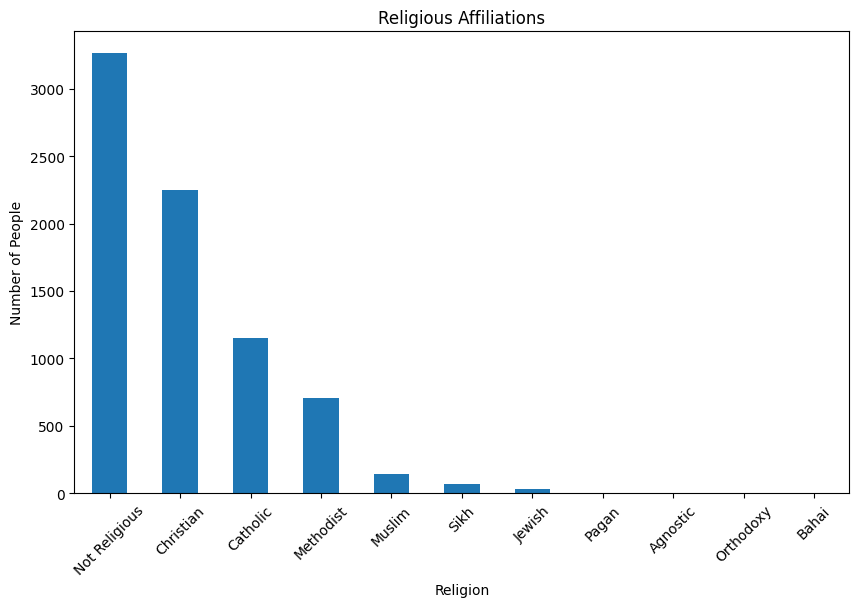


Religious Affiliations Count:
Religion
Not Religious    3261
Christian        2248
Catholic         1154
Methodist         708
Muslim            143
Sikh               70
Jewish             33
Pagan               3
Agnostic            2
Orthodoxy           1
Bahai               1
Name: count, dtype: int64


In [91]:
# count Religions 
religion_counts = census_df['Religion'].value_counts()

plt.figure(figsize=(10,6))
religion_counts.plot(kind='bar')
plt.xlabel("Religion")
plt.ylabel("Number of People")
plt.title("Religious Affiliations")
plt.xticks(rotation=45)
plt.savefig('religion.png')
plt.show()

print("\nReligious Affiliations Count:")
print(religion_counts)

#### MARITAL STATUS DISTRIBUTION

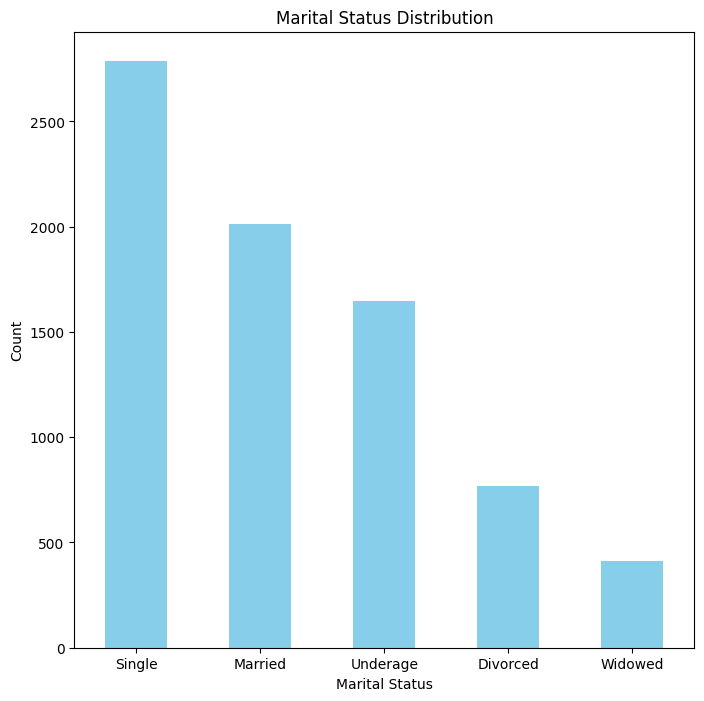


Marital Status Counts:
Marital Status
Single      2787
Married     2012
Underage    1647
Divorced     768
Widowed      410
Name: count, dtype: int64


In [92]:
# a look at marital status counts
marital_counts = census_df['Marital Status'].value_counts()

plt.figure(figsize=(8,8))
marital_counts.plot(kind='bar', color='skyblue')
plt.title("Marital Status Distribution")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.savefig('maritalstatus1.png')
plt.show()

print("\nMarital Status Counts:")
print(marital_counts)


#### HOUSEHOLD OCCUPANCY LEVELS ANALYSIS

Average occupancy per household: 2.57
Median occupancy per household: 2.0
Households with occupancy < 4 (under-used): 2289
Households with occupancy = 4: 314
Households with occupancy > 4 (over-used): 366


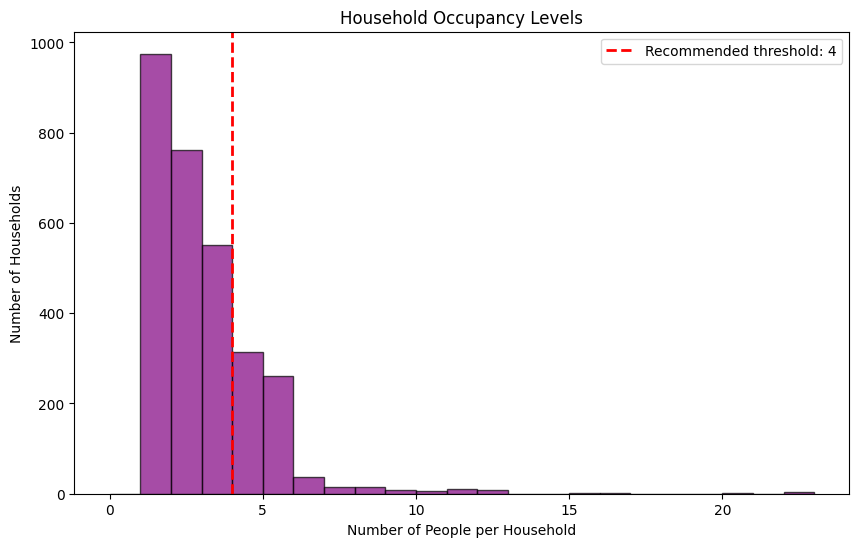

In [93]:
# composite household identifier (combining Street and House Number)
census_df['household'] = census_df['Street'].str.strip() + " " + census_df['House Number'].astype(str).str.strip()

# Group by the new household identifier to calculate occupancy
occupancy = census_df.groupby('household').size()

# 4 was chosen as the recommended occupancy threshold based on local standards
recommended_threshold = 4

# Calculate statistics
average_occupancy = occupancy.mean()
median_occupancy = occupancy.median()

# Count households that are under-used, exactly at threshold, or over-used
num_underused = occupancy[occupancy < recommended_threshold].count()
num_exact = occupancy[occupancy == recommended_threshold].count()
num_overused = occupancy[occupancy > recommended_threshold].count()

print(f"Average occupancy per household: {average_occupancy:.2f}")
print(f"Median occupancy per household: {median_occupancy}")
print(f"Households with occupancy < {recommended_threshold} (under-used): {num_underused}")
print(f"Households with occupancy = {recommended_threshold}: {num_exact}")
print(f"Households with occupancy > {recommended_threshold} (over-used): {num_overused}")

# Plot a histogram of occupancy with a line showing the recommended threshold
plt.figure(figsize=(10,6))
plt.hist(occupancy, bins=range(0, occupancy.max() + 2), color='purple', alpha=0.7, edgecolor='black')
plt.axvline(recommended_threshold, color='red', linestyle='dashed', linewidth=2,
            label=f'Recommended threshold: {recommended_threshold}')
plt.xlabel("Number of People per Household")
plt.ylabel("Number of Households")
plt.title("Household Occupancy Levels")
plt.legend()
plt.savefig('householde levels.png')
plt.show()


#### TOP 10 OCCUPATIONS (Excluding Certain Categories)


Number of  Students: 1849


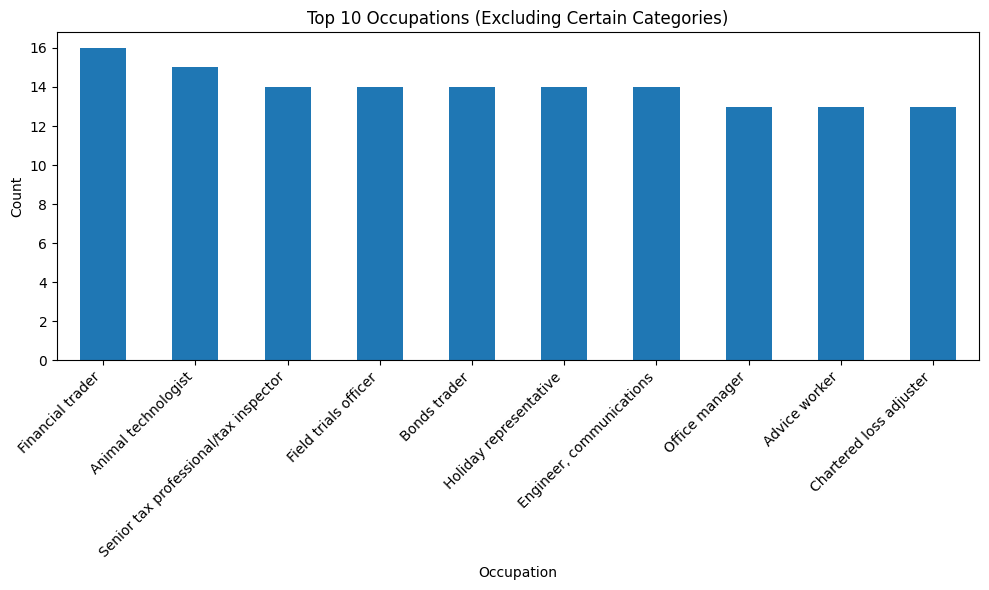

In [94]:
# Count university students (assuming occupation text contains 'student')
students = census_df[census_df['Occupation'].str.contains('student', case=False, na=False)]
print(f"\nNumber of  Students: {students.shape[0]}")

# List of occupations to exclude
exclude = ["Student", "University Student", "PhD Student", "Unemployed", "Child", "Retired"]

# Filter the DataFrame to exclude these occupations (exact matches)
filtered_df = census_df[~census_df['Occupation'].isin(exclude)]

# Calculate the top 10 occupations from the filtered data
top_occupations = filtered_df['Occupation'].value_counts().head(10)

plt.figure(figsize=(10,6))
top_occupations.plot(kind='bar')
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.title("Top 10 Occupations (Excluding Certain Categories)")
plt.xticks(rotation=45, ha='right')  # Rotate labels 45° and align them to the right
plt.tight_layout()                   # Adjust layout so labels fit properly
plt.savefig('Top 10 Occupations (Excluding Certain Categories).png')
plt.show()


#### COMMUTER ANALYSIS

In [95]:
# keywords that likely indicate commuter roles
commuter_keywords = [
    'analyst', 'consultant', 'engineer', 'scientist', 'specialist', 'planner',
    'technician', 'developer', 'architect', 'manager', 'officer', 'advisor',
    'surveyor', 'accountant', 'lawyer', 'solicitor', 'actuary', 'doctor',
    'nurse', 'haematologist', 'psychologist', 'teacher', 'lecturer', 'professor',
    'producer', 'editor', 'journalist', 'designer', 'chartered', 'actor', 'banker', 'cabin', 'chief',
    'pilot','film', 'student', 'field', 'travel'
    
]

# Function to detect commuter based on keywords
def is_commuter(occupation):
    if pd.isna(occupation):
        return False
    occupation = occupation.lower()
    return any(keyword in occupation for keyword in commuter_keywords)

# new column indicating if the person is likely a commuter
census_df['likely_commuter'] = census_df['Occupation'].apply(is_commuter)

#  view the summary
print(census_df['likely_commuter'].value_counts())


likely_commuter
True     4684
False    2940
Name: count, dtype: int64


In [98]:
# Count the number of commuters vs non-commuters
commuter_counts = census_df['likely_commuter'].value_counts()

# Calculate percentages of communter counts
commuter_percentages = census_df['likely_commuter'].value_counts(normalize=True) * 100

print("Counts:")
print(commuter_counts)
print("\nPercentages (in %):")
print(commuter_percentages.round(1))


Counts:
likely_commuter
True     4684
False    2940
Name: count, dtype: int64

Percentages (in %):
likely_commuter
True     61.4
False    38.6
Name: proportion, dtype: float64


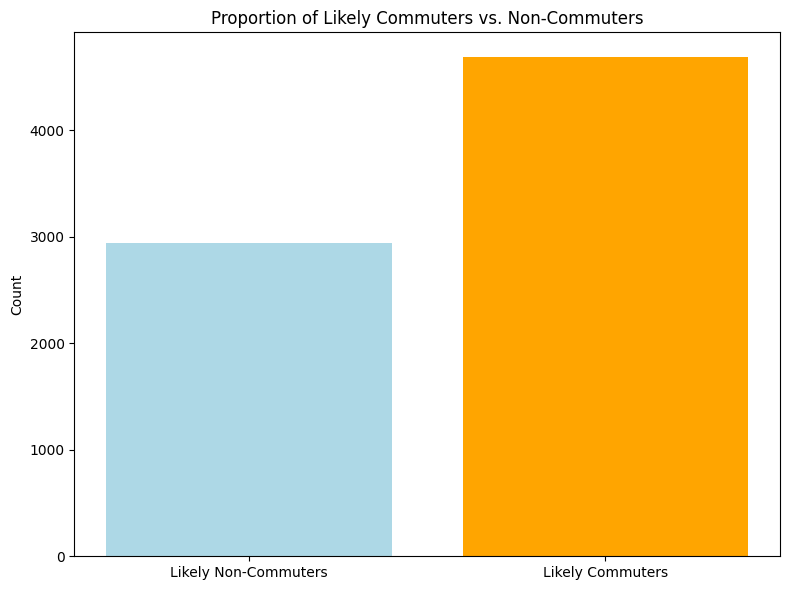

In [99]:
# Count the number of commuters vs. non-commuters
commuter_counts = census_df['likely_commuter'].value_counts()

# Reorder so that False (Non-Commuters) comes first, then True (Commuters)
commuter_counts = commuter_counts.reindex([False, True])

# Create a bar chart
plt.figure(figsize=(8,6))
bars = plt.bar(['Likely Non-Commuters', 'Likely Commuters'], commuter_counts, color=['lightblue', 'orange'])
plt.title("Proportion of Likely Commuters vs. Non-Commuters")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("Proportion_of_Likely_Commuters_vs_Non-Commuters_Bar.png")
plt.show()


#### BIRTH RATE CALCULATIONS

In [101]:
# Birth Rate Calculation for the past year
#Compute the number of children aged zero (births in the past year)
children_aged_zero = census_df[census_df['Age'] == 0]
num_children_aged_zero = len(children_aged_zero)

#Define potential mothers using women aged 18-49
potential_mothers = census_df[(census_df['Gender'] == 'Female') & (census_df['Age'] >= 18) & (census_df['Age'] <= 49)]
num_potential_mothers = len(potential_mothers)

#Compute the birth rate per 100,000 potential mothers
birth_rate_per_100k = (num_children_aged_zero / num_potential_mothers) * 100000

print("Number of children aged zero:", num_children_aged_zero)
print("Number of potential mothers (age 18-49):", num_potential_mothers)
print("Birth rate per 100,000 potential mothers:", birth_rate_per_100k)

Number of children aged zero: 74
Number of potential mothers (age 18-49): 2049
Birth rate per 100,000 potential mothers: 3611.517813567594


In [102]:
# Birth Rate Calculation for 4 Years Ago 
# Compute the number of children aged 4  for births 4 years ago
children_aged_four = census_df[census_df['Age'] == 4]
num_children_aged_four = len(children_aged_four)

# Define potential mothers for births 4 years ago.
# If for current births we use women aged 18-49, then for births 4 years ago use women now aged 22-53.
potential_mothers_4years = census_df[(census_df['Gender'] == 'Female') & (census_df['Age'] >= 22) & (census_df['Age'] <= 53)]
num_potential_mothers_4years = len(potential_mothers_4years)

# Compute the birth rate per 100,000 potential mothers for births 4 years ago
birth_rate_4years_per_100k = (num_children_aged_four / num_potential_mothers_4years) * 100000

print("Number of children aged four (births 4 years ago):", num_children_aged_four)
print("Number of potential mothers (aged 22-53):", num_potential_mothers_4years)
print("Birth rate per 100,000 potential mothers (4 years ago):", birth_rate_4years_per_100k)


Number of children aged four (births 4 years ago): 96
Number of potential mothers (aged 22-53): 1974
Birth rate per 100,000 potential mothers (4 years ago): 4863.22188449848


#### DEATH RATE CALCULATIONS

In [103]:
# 5-year age bins covering from 70 to 105
bins = range(70, 110, 5)  
census_df['age_bin'] = pd.cut(census_df['Age'], bins=bins, right=False)

# Group the data by the new age_bin and count the number of individuals in each bin
age_counts = census_df.groupby('age_bin').size()

# the bin [70,75) covers ages 70 to 74 and the bin [100,105) covers ages 100 to 104.
group_70_74 = age_counts.loc[pd.Interval(70,75,closed='left')]
group_100_104 = age_counts.loc[pd.Interval(100,105,closed='left')]

cumulative_deaths = group_70_74 - group_100_104

# Calculate the cumulative death rate per 100,000 individuals in the 70–74 age group
death_rate_per_100k = (cumulative_deaths / group_70_74) * 100000

print("Number in age group 70-74:", group_70_74)
print("Number in age group 100-104:", group_100_104)
print("Cumulative reduction (proxy for deaths):", cumulative_deaths)
print("Death rate per 100,000 (cumulative, 70-74 to 100-104):", death_rate_per_100k)


Number in age group 70-74: 238
Number in age group 100-104: 6
Cumulative reduction (proxy for deaths): 232
Death rate per 100,000 (cumulative, 70-74 to 100-104): 97478.99159663865


C:\Users\user\AppData\Local\Temp\ipykernel_16592\1707419929.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_counts = census_df.groupby('age_bin').size()


In [104]:
# 5-year age bins covering from 70 to 105
bins = range(70, 110, 5)  
census_df['age_bin'] = pd.cut(census_df['Age'], bins=bins, right=False)

# Group by age_bin to get counts in each group
age_counts = census_df.groupby('age_bin').size()

# Sort the age bins in ascending order based on the left endpoint
age_intervals = sorted(age_counts.index, key=lambda x: x.left)

# Compare adjacent age groups
for i in range(1, len(age_intervals)):
    prev_bin = age_intervals[i-1]
    curr_bin = age_intervals[i]
    count_prev = age_counts[prev_bin]
    count_curr = age_counts[curr_bin]
    
    # a proxy for cumulative deaths between the two groups
    reduction = count_prev - count_curr
    
    # Calculate a "death rate" per 100,000 individuals in the previous age group
    death_rate_per_100k = (reduction / count_prev) * 100000 if count_prev != 0 else None
    
    # Print out the comparison for each pair
    print(f"From {int(prev_bin.left)}-{int(prev_bin.right)-1} to {int(curr_bin.left)}-{int(curr_bin.right)-1}:")
    print(f"  Count in {int(prev_bin.left)}-{int(prev_bin.right)-1}: {count_prev}")
    print(f"  Count in {int(curr_bin.left)}-{int(curr_bin.right)-1}: {count_curr}")
    print(f"  Reduction: {reduction}")
    print(f"  Proxy death rate per 100,000: {death_rate_per_100k:.2f}\n")


From 70-74 to 75-79:
  Count in 70-74: 238
  Count in 75-79: 184
  Reduction: 54
  Proxy death rate per 100,000: 22689.08

From 75-79 to 80-84:
  Count in 75-79: 184
  Count in 80-84: 137
  Reduction: 47
  Proxy death rate per 100,000: 25543.48

From 80-84 to 85-89:
  Count in 80-84: 137
  Count in 85-89: 68
  Reduction: 69
  Proxy death rate per 100,000: 50364.96

From 85-89 to 90-94:
  Count in 85-89: 68
  Count in 90-94: 19
  Reduction: 49
  Proxy death rate per 100,000: 72058.82

From 90-94 to 95-99:
  Count in 90-94: 19
  Count in 95-99: 11
  Reduction: 8
  Proxy death rate per 100,000: 42105.26

From 95-99 to 100-104:
  Count in 95-99: 11
  Count in 100-104: 6
  Reduction: 5
  Proxy death rate per 100,000: 45454.55



C:\Users\user\AppData\Local\Temp\ipykernel_16592\1474604605.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_counts = census_df.groupby('age_bin').size()


#### INFIRMITY ANALYSIS

In [105]:
# Count the occurrences in the 'Infirmity' column
infirmity_counts = census_df['Infirmity'].value_counts()

# Calculate frequency percentages
total = infirmity_counts.sum()
frequency_pct = (infirmity_counts / total) * 100

# Create a summary DataFrame with the counts and frequency percentages
infirmity_table = pd.DataFrame({
    "Count": infirmity_counts,
    "Frequency (%)": frequency_pct.round(1)
})

# Display the table with the Infirmity values as the index
print(infirmity_table)


                   Count  Frequency (%)
Infirmity                              
No Infirmity        7575           99.4
Disabled              42            0.6
Unknown Infection      7            0.1


In [106]:
backup_df = census_df.copy()